<a href="https://colab.research.google.com/github/cdrowley/notebook-demos/blob/main/sales_by_country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [1]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip && unzip online+retail.zip && rm online+retail.zip

--2023-07-26 21:13:26--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [   <=>              ]  22.62M  55.6MB/s    in 0.4s    

2023-07-26 21:13:26 (55.6 MB/s) - ‘online+retail.zip’ saved [23715478]

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


sales = pd.read_excel('/content/Online Retail.xlsx')
sales.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


### Plot Country Data

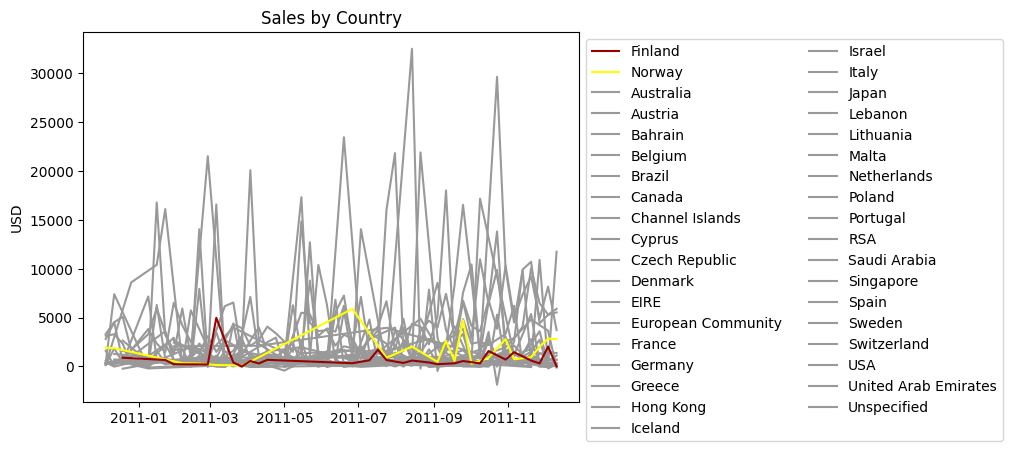

In [3]:
def set_colors(series, color_map, default='#999999'):
    return series.map(color_map).fillna(default)


def set_category_order(series, preferred_categories):
    remaining_categories = sorted(cat for cat in series.unique() if cat not in preferred_categories)
    new_categories = list(preferred_categories) + remaining_categories
    return pd.Categorical(series, categories=new_categories, ordered=True)


def plot(df):
  fig, ax = plt.subplots()

  for country in df['Country'].sort_values(ascending=False).unique():
      cdf = df.query("Country == @country")
      ax.plot(cdf['InvoiceDate'], cdf['Total'], label=country, color=cdf['Color'].iloc[0])

  ax.legend(bbox_to_anchor=(1, 1), ncols=2, reverse=True)
  plt.title('Sales by Country')
  plt.ylabel('USD')

  return df


color_map = {'Finland': '#990000', 'Norway': '#FFFF00'}
grouper = [pd.Grouper(key='InvoiceDate', freq='w'), 'Country']

final = (
    sales
    .query('Country != "United Kingdom"')
    .astype({'InvoiceDate': 'datetime64[ns]'})
    .assign(Total=lambda df: df['Quantity'] * df['UnitPrice'])
    .groupby(grouper)
    .sum(numeric_only=True)
    ['Total']
    .reset_index()
    .assign(
        Color=lambda df: set_colors(df['Country'], color_map)
        , Country=lambda df: set_category_order(df['Country'], color_map.keys())
    )
    .pipe(plot)
)

### Plotly Version

In [4]:
pd.options.plotting.backend = "plotly"


data = final.sort_values(by=['Country', 'InvoiceDate'], ascending=[False, True])
fig = data.plot(
    x='InvoiceDate'
    , y='Total'
    , color='Country'
    , color_discrete_map={country: color_map.get(country, 'grey') for country in data['Country'].unique()}
    , template='plotly_white'
)

fig.update_layout(legend={'traceorder': 'reversed'})